# LUNG CANCER PROJECT

# Librabries Required

In [1]:
import numpy as np 
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

import seaborn as sns
import matplotlib.pyplot as plt

# Problem Statement

In [1]:
# To predict Patient Has lunbg cancer or not.

# Data Gathering

In [2]:
df = pd.read_csv('lung_cancer.csv')
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

# (EDA) Exploratory Data Analysis and Feature Engineering

In [4]:
df.isna().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

<AxesSubplot:>

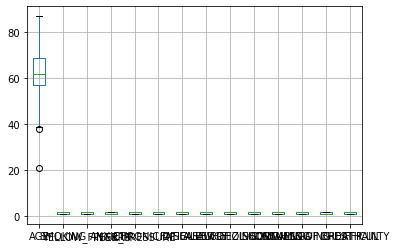

In [5]:
df.boxplot()

In [6]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


<AxesSubplot:xlabel='AGE'>

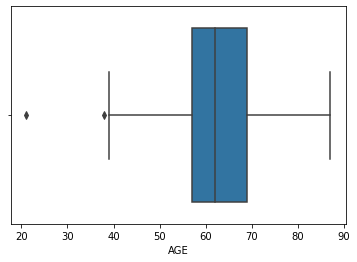

In [7]:
sns.boxplot(x = df['AGE'])

In [ ]:
## 

In [8]:
df['GENDER'].replace({'M':0,'F':1},inplace = True)

In [9]:
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,0,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,1,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,0,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,1,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,1,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,0,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,0,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,0,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES


In [10]:
from scipy.stats import zscore

In [11]:
def get_outliers(column_name):
    outliers = []
    z_val = zscore(df[column_name])
    index = np.where(np.abs(z_val) > 3)[0]
    print(df[column_name].iloc[index])
    outliers.append(index)
    return print(outliers)

In [12]:
get_outliers('AGE')

22     21
238    38
Name: AGE, dtype: int64
[array([ 22, 238], dtype=int64)]


In [13]:
df = df.drop([22,238],axis = 0)

<AxesSubplot:>

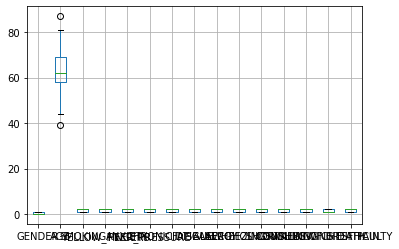

In [14]:
df.boxplot()

<AxesSubplot:xlabel='AGE'>

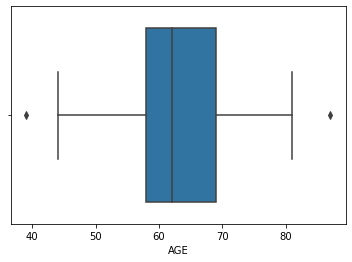

In [15]:
sns.boxplot(x = df['AGE'])

In [16]:
x = df.drop('LUNG_CANCER',axis = 1)
y = df.LUNG_CANCER

In [17]:
x

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,0,69,1,2,2,1,1,2,1,2,2,2,2,2,2
1,0,74,2,1,1,1,2,2,2,1,1,1,2,2,2
2,1,59,1,1,1,2,1,2,1,2,1,2,2,1,2
3,0,63,2,2,2,1,1,1,1,1,2,1,1,2,2
4,1,63,1,2,1,1,1,1,1,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,1,56,1,1,1,2,2,2,1,1,2,2,2,2,1
305,0,70,2,1,1,1,1,2,2,2,2,2,2,1,2
306,0,58,2,1,1,1,1,1,2,2,2,2,1,1,2
307,0,67,2,1,2,1,1,2,2,1,2,2,2,1,2


In [18]:
y 

0      YES
1      YES
2       NO
3       NO
4       NO
      ... 
304    YES
305    YES
306    YES
307    YES
308    YES
Name: LUNG_CANCER, Length: 307, dtype: object

In [19]:
y.value_counts()

YES    269
NO      38
Name: LUNG_CANCER, dtype: int64

## Sampling of data


In [20]:
from imblearn.over_sampling import RandomOverSampler

In [21]:
random_sampling = RandomOverSampler()
x_sample,y_sample = random_sampling.fit_resample(x,y)
x_sample

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,0,69,1,2,2,1,1,2,1,2,2,2,2,2,2
1,0,74,2,1,1,1,2,2,2,1,1,1,2,2,2
2,1,59,1,1,1,2,1,2,1,2,1,2,2,1,2
3,0,63,2,2,2,1,1,1,1,1,2,1,1,2,2
4,1,63,1,2,1,1,1,1,1,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
533,1,67,1,2,1,1,1,1,1,2,1,2,2,1,1
534,1,64,2,2,1,2,2,1,1,1,1,1,1,1,1
535,0,47,2,2,1,1,2,1,1,1,1,1,1,1,2
536,0,60,1,1,2,2,2,1,1,1,2,1,1,1,1


In [22]:
y_sample.value_counts()

YES    269
NO     269
Name: LUNG_CANCER, dtype: int64

# Model Training

In [ ]:
# we have 

# 1. x_sample data 
# 2. y_sample data

## Splitting of data

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x_sample, y_sample, test_size = 0.30, random_state = 11, stratify = y_sample)

##  Training model

In [24]:
dt_clf = DecisionTreeClassifier(random_state=11)            # object created for class of classification problem
dt_clf.fit(x_train,y_train)                                  # training model

DecisionTreeClassifier(random_state=11)

# Model Evaluation

## Training data evaluation

In [25]:
y_train_pred = dt_clf.predict(x_train)

acc_score = accuracy_score(y_train_pred,y_train)
print("accuracy_score :\n",acc_score)

clf_report = classification_report(y_train_pred,y_train)
print("classification_report :\n",clf_report)

conf_matrix = confusion_matrix(y_train_pred,y_train)
print("confusion_matrix :\n",conf_matrix)

accuracy_score :
 0.9973404255319149
classification_report :
               precision    recall  f1-score   support

          NO       1.00      0.99      1.00       189
         YES       0.99      1.00      1.00       187

    accuracy                           1.00       376
   macro avg       1.00      1.00      1.00       376
weighted avg       1.00      1.00      1.00       376

confusion_matrix :
 [[188   1]
 [  0 187]]


## Testing data evaluation

In [26]:
y_test_pred = dt_clf.predict(x_test)

acc_score = accuracy_score(y_test_pred,y_test)
print("accuracy_score :\n",acc_score)

clf_report = classification_report(y_test_pred,y_test)
print("classification_report :\n",clf_report)

conf_matrix = confusion_matrix(y_test_pred,y_test)
print("confusion_matrix :\n",conf_matrix)

accuracy_score :
 0.9814814814814815
classification_report :
               precision    recall  f1-score   support

          NO       1.00      0.96      0.98        84
         YES       0.96      1.00      0.98        78

    accuracy                           0.98       162
   macro avg       0.98      0.98      0.98       162
weighted avg       0.98      0.98      0.98       162

confusion_matrix :
 [[81  3]
 [ 0 78]]


In [ ]:
# Training accuracy = 0.9973404255319149    99 %
# Training accuracy = 0.9814814814814815    98 %   

# for more accuracy applying hyperparameter tuning on data

# Hyperparamter Tuning

## RandomizedSearchCV

In [28]:
import warnings                                    # for removing warnings 
warnings.filterwarnings('ignore')                  # ignore warnings

In [29]:
dt_hyp = DecisionTreeClassifier(random_state=11)       # object created for classifier problem

hyper = {"criterion" : ['gini','entropy'],           # hyperparameter grid data
    "max_depth" : np.arange(1,50),
    "min_samples_split" : np.arange(1,50),
    "min_samples_leaf" : np.arange(1,50)}

rd_hyper = RandomizedSearchCV(dt_hyp,hyper)                # applying randomisedsearchcv with hyperparameter grid on model
rd_hyper.fit(x_train,y_train)                              # train model with train data
rd_hyper.best_estimator_                                   # for best parameters of hyperparameter grid

DecisionTreeClassifier(max_depth=28, min_samples_leaf=13, min_samples_split=21,
                       random_state=11)

In [30]:
dt_hyper = rd_hyper.best_estimator_                  # by using best hyperparameters 
dt_hyper.fit(x_train,y_train)                        # training model

DecisionTreeClassifier(max_depth=28, min_samples_leaf=13, min_samples_split=21,
                       random_state=11)

# Model Evalaution adter hypertuning

## Training data evaluation

In [31]:
y_train_pred = dt_hyper.predict(x_train)

acc_score = accuracy_score(y_train_pred,y_train)
print("accuracy_score :\n",acc_score)

clf_report = classification_report(y_train_pred,y_train)
print("classification_report :\n",clf_report)

conf_matrix = confusion_matrix(y_train_pred,y_train)
print("confusion_matrix :\n",conf_matrix)

accuracy_score :
 0.8856382978723404
classification_report :
               precision    recall  f1-score   support

          NO       0.91      0.87      0.89       197
         YES       0.86      0.91      0.88       179

    accuracy                           0.89       376
   macro avg       0.89      0.89      0.89       376
weighted avg       0.89      0.89      0.89       376

confusion_matrix :
 [[171  26]
 [ 17 162]]


## Testing data Evalation

In [32]:
y_test_pred = dt_hyper.predict(x_test)

acc_score = accuracy_score(y_test_pred,y_test)
print("accuracy_score :\n",acc_score)

clf_report = classification_report(y_test_pred,y_test)
print("classification_report :\n",clf_report)

conf_matrix = confusion_matrix(y_test_pred,y_test)
print("confusion_matrix :\n",conf_matrix)

accuracy_score :
 0.8950617283950617
classification_report :
               precision    recall  f1-score   support

          NO       0.89      0.90      0.89        80
         YES       0.90      0.89      0.90        82

    accuracy                           0.90       162
   macro avg       0.90      0.90      0.90       162
weighted avg       0.90      0.90      0.90       162

confusion_matrix :
 [[72  8]
 [ 9 73]]


In [ ]:
# after hyperparameter tuning getting low accuracy than withouy hypertuning 

Training accuracy :   0.8856382978723404    86%
Testing accuracy  :   0.8950617283950617    89%
    
# So hypertuning not required here considering without hyperparamter tuning accuracies

Training accuracy = 0.9973404255319149    99 %
Training accuracy = 0.9814814814814815    98 %   